In [1]:
# loading in our packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. ~~Show that $m(a + bX) = a+b \times m(X)$.~~
2. ~~Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$~~
3. ~~Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.~~
4. ~~Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain.~~ ~~Does your answer apply to any quantile? The IQR? The range?~~
5. ~~Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?~~

#### part one

In [2]:
# i needa generate a bunch of random datapoints to fit in 'x'. 

# using the RNG from the 'programming' assignment to create these datapoints. 
import numpy as np
import math as math
np.random.seed(100) # Set the seed for the random number generator
rho, sigma_x, sigma_y = -.4, 3, 2 # Variance-Covariance Parameters
vcv = np.array([[sigma_x**2, rho*sigma_x*sigma_y],
                [rho*sigma_x*sigma_y,sigma_y**2]]) # VCV Matrix
mu = np.array([-1,2]) # Population averages
sample = np.random.multivariate_normal(mu,vcv,200) # Multivariate normal draws
x = sample[:,0] # all values corresponding to the first column in your matrix.
y = sample[:,1] 

In [3]:
# calculating m(a + bX) 
a = 5
b = 10
values_to_average = []
for i in x: 
    val = a+(b*i)
    values_to_average.append(val)
values_to_average[1:5] # nice, our algorithm worked 
# our final answer
x_bar_1 = np.mean(values_to_average).item()
x_bar_1

-5.899806430403439

In [4]:
# calculating a+b*m(X)
x_bar = np.mean(x).item()
thingy_to_add_to_a = b*x_bar
x_bar_2 = a+thingy_to_add_to_a
x_bar_2
# they are the same 

# what's so important about them being the same, though? 

-5.899806430403437

#### part two

In [5]:
# we've already randomly generated our data, and also defined a and b. 
# so we're gonna calculate a+bY
values_for_covariance_ys = []
for i in y: 
    val = a+(b*i)
    val = val.item()
    values_for_covariance_ys.append(val)
# printing out the first few items in the list just to make sure that our...
# ...code worked properly. 
values_for_covariance_ys[1:5]

[34.50601241860406, 44.872595231219144, 10.313211827070592, 26.888317625573045]

In [6]:
# calculating the first covariance that was asked for
# copying, pasting, and modifying work from a previous assignment. 
# work smarter not harder
def y_bar(y):
  sample_mean_1 = (np.sum(y))/(len(y))
  return sample_mean_1
y_bar(values_for_covariance_ys)

def sample_cov(x, y):
  x_vals = []
  y_vals = []
  xy_vals = []
  for i in x:
    # calculating each (xn-xbar) value for numerator
    x_val = i-x_bar
    # appending to a list
    x_vals.append(x_val)
  for i in y:
    # calculating each (yn-ybar) value for numerator
    y_val = i-y_bar(y)
    # appending to a list
    y_vals.append(y_val)
  for (i, n) in zip(x_vals, y_vals):
    # calculating each (xn-xbar)*(yn-ybar) value in numerator
    xy_val = i*n
    xy_vals.append(xy_val)
  # summing up all values in numerator, dividing them by N-1
  return (np.sum(xy_vals)/(len(xy_vals)-1)).item()
sample_cov(x,values_for_covariance_ys)

-28.396505928938772

In [7]:
# calculating the second covariance that was asked for
b*sample_cov(x,y)
# these are also the same

-28.396505928938772

#### part three

In [8]:
# a+bX
# we already had that saved as values_to_average, let's rename it so we...
# ...can properly work with it 
values_for_cov = values_to_average 

# calculating cov(a+bX, a+bX)
sample_cov(values_for_cov, values_for_cov)

1078.9899016136324

In [9]:
# calculating b^2*cov(X, X) 
(b**2)*sample_cov(x, x)
# yep they're the same once again. 

1078.9899016136324

In [10]:
# we also need to take a peek at the sample variance 
# our sample variance function will look extremely similar to our...
# ...covariance function but it will only need one value (our x value)...
# ...as input. 
def sample_variance(x):
    x_vals = []
    xsq_vals = []
    for i in x: 
        x_val = i-x_bar
        x_vals.append(x_val) 
    for i in x_vals:
        xsq_val = i*i
        xsq_vals.append(xsq_val)
    return (np.sum(xsq_vals)/(len(xsq_vals)-1)).item()
sample_variance(x)

10.789899016136323

In [11]:
# is the sample variance the same as covariance of x and x? 
sample_cov(x,x)
# yep! 

10.789899016136323

#### part four

I needed to re-define "non-decreasing transformations" for myself. 

- Non-decreasing functions are functions that never decrease (so exactly what it says on the tin).
- They are a type of monotonic function, which means that they preserve or reverse the order of the set it uses as input. Non-decreasing functions always preserve the order of the sets they use as input.

Bearing this in mind...
- The median of a function is always going to be in the middle of a set. If our set has an odd number of values, it will be the number in the middle, and if our set has an even number of values, it will be the mean of the two middle numbers.
- If a set is transformed with a non-decreasing function, then the number (NOT THE VALUE OF THAT NUMBER, TO BE CLEAR) that was the median before the set's transformation will also be the median after transformation. (The number's ordinality does not change, basically.) 
- So yes, the non-decreasing transformation of a median would be the same as the median of the transformed set. 

We can demonstrate this below! 

In [12]:
# is a non-decreasing transformation of the median the median...
# ...of the transformed variable? 
# is there a way to get the median of x? yes there is
import statistics 
median_x = statistics.median(x).item()
median_x

-1.0015453123146276

In [13]:
# lets see if we can transform x 
arcsinh_x = np.arcsinh(x)

# let's find the median of our transformed data. 
# 'the same as the median of the transformed set'
arcsinh_x_median = statistics.median(arcsinh_x).item()
arcsinh_x_median

-0.882436568730216

In [14]:
# we can also find the arcsinh of the median we calculated for x. 
# 'the non-decreasing transformation of a median'
arcsinh_median_of_x = np.arcsinh(median_x).item()
arcsinh_median_of_x
# yes! they're the same! 

-0.8824658658040464

"Does your answer apply to any quantile? The IQR? The range?"
Yes, it would. Because non-decreasing functions preserve the order of the set used as input, the numbers that certain represented summary statistics before transformation will represent those summary statistics after their transformation as well. When I say "certain summary statistics," I mean summary statistics that pertain to the position of numbers in a set; and median, quantile, IQR, and range all fit under that umbrella. The ordinality/position of the numbers in the set never changed, even though their values *have* changed. 

In [15]:
# though it's always a good idea to test the theory. 
# i will test it with IQR
# summary statistics of transformed x
pd.DataFrame(arcsinh_x).describe()

,0
count,200.000000
mean,-0.541387
std,1.605188
min,-3.023054
25%,-1.917848
50%,-0.882437
75%,0.704035
max,2.742364


In [16]:
# summary statistics of x we can transform
pd.DataFrame(x).describe()

,0
count,200.000000
mean,-1.089981
std,3.284798
min,-10.252662
25%,-3.329691
50%,-1.001545
75%,0.763674
max,7.729610


In [17]:
# let's look at the arcsinhs of values we use to calculate iqr
print(np.arcsinh(-3.329691)) # 25th percentile
print(np.arcsinh(-1.001545)) # 50th percentile
print(np.arcsinh(0.763674)) # 75th percentile
# yep i'm right! 

-1.9178493303769566
-0.8824656451348053
0.7040504994610307


#### part five
The question in english: 'is it always true that the mean of a transformation of X is the same as the transformation of a mean of X?' 

I need to give a concreate example of what the question is asking for - just for myself, just so I know what I'm doing. 
- Let's say that our transformation function 'g' is the inverse hyperbolic sine. (It doesn't have to be, just using an example)
- Our mean function 'm' obviously finds the mean of whatever we plug in. 
- g(m(X)) and m(g(X)) are composite functions. 
- g(m(X)) will find the inverse hyperbolic sine of the mean of quantities in our vector X. 
- m(g(X)) will find the mean of the inverse hyperbolic sines of quantities in our vector X.

Now onto actually answering the question...
- Composite functions f(g(x)) and g(f(x)) (I'll call functions of these sorts "complementary composite functions") *do not necessarily* have to equal one another. 
- My hypothesis is that m(g(X)) and g(m(X)) will *not* equal one another because the transformation exists for the sole purpose of changing our data's distribution to make it more useable, and it would make no sense to "protect" the mean from our transformation in any way. The mean of arcsinh of all data points, in fact, *should* be completely different from the arcsinh of the mean.  
- The mean also has nothing to do with the ordinality of points in our dataset, so the special properties of non-decreasing functions do not guard it the way it would guard the median.

In [18]:
# but we can test whether f(g(x)) = g(f(x)) in this specific context.
# let's take the mean, and then find the inverse hyperbolic sine of it. 
mean_x = np.mean(x).item()
print(mean_x)
print(np.arcsinh(mean_x))

-1.0899806430403438
-0.9435903426488115


In [19]:
# we'll also take the inverse hyperbolic sine of all points in our dataset x... 
# ...and find their mean. 
np.mean(arcsinh_x).item()
# yeah, it's different. 

-0.5413865464888381

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. ~~Load the `./data/ForeignGifts_edu.csv` dataset.~~
2. ~~For `Foreign Gift Amount`, create a histogram~~ ~~and describe the variable.~~ ~~Describe your findings.~~
3. ~~For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?~~
4. ~~Create a kernel density plot of the log of `Foreign Gift Amount`,~~ ~~and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type.~~ ~~Do you notice any patterns?~~
5. ~~What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?~~
6. ~~What are the top 15 institutions in terms of the total amount of money they receive?~~ ~~Make a histogram of the total amount received by all institutions.~~
7. ~~Which giftors provide the most money, in total?~~

#### part one

In [20]:
# loading our data 
foreigngifts = pd.read_csv("./data/EDA/ForeignGifts_edu.csv") 
foreigngifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


#### part two

The variable 'foreign gift amount' describes the amount of money an institution has received from a certain other institution or organization in (presumably) US dollars. 

(array([2.7996e+04, 1.1300e+02, 4.9000e+01, 2.3000e+01, 1.1000e+01,
        3.0000e+00, 4.0000e+00, 1.5000e+01, 0.0000e+00, 7.0000e+00]),
 array([ -537770.        ,  9516006.9       , 19569783.8       ,
        29623560.7       , 39677337.6       , 49731114.5       ,
        59784891.40000001, 69838668.3       , 79892445.2       ,
        89946222.10000001, 99999999.        ]),
 <BarContainer object of 10 artists>)

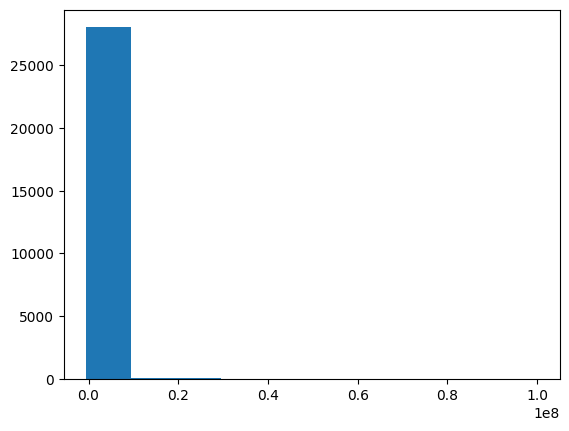

In [21]:
# foreign gift amount - histogram
plt.hist(foreigngifts["Foreign Gift Amount"])
# seems like there are some MEGA OUTLIERS. 
# is there a way to 'zoom in' or do some EDA aside from the outliers? 

In [22]:
# there are other ways of exploring the data, i guess. 
foreigngifts["Foreign Gift Amount"].describe()
# a max gift of a hundred million dollars is wild. 
# also, our minimum gift is 537,770. that means money was taken away from...
# ...this person? 

# (printed below is a full description [in the form of summary statistics]
# ...of our variable) 

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

(array([1.0000e+00, 1.0000e+00, 1.5343e+04, 5.3350e+03, 2.9970e+03,
        1.1310e+03, 9.8400e+02, 3.6900e+02, 2.4400e+02, 2.5500e+02,
        1.5800e+02, 2.3000e+02, 8.5000e+01, 1.2200e+02, 5.5000e+01,
        9.7000e+01, 4.4000e+01, 5.0000e+01, 4.8000e+01, 3.5000e+01,
        5.3000e+01, 2.6000e+01, 2.6000e+01, 2.9000e+01, 2.5000e+01]),
 array([-537770., -316260.,  -94750.,  126760.,  348270.,  569780.,
         791290., 1012800., 1234310., 1455820., 1677330., 1898840.,
        2120350., 2341860., 2563370., 2784880., 3006390., 3227900.,
        3449410., 3670920., 3892430., 4113940., 4335450., 4556960.,
        4778470., 4999980.]),
 <BarContainer object of 25 artists>)

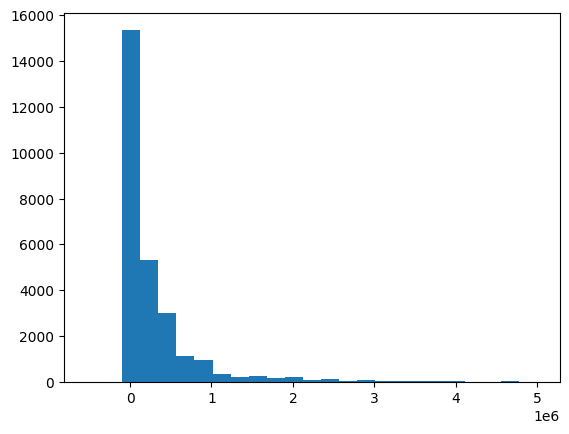

In [23]:
# gifts smaller than fifty million freaking dollars 
foreigngiftssmaller = foreigngifts["Foreign Gift Amount"].where(foreigngifts["Foreign Gift Amount"] < 5000000)
plt.hist(foreigngiftssmaller, bins=25)

(array([234.,  82.,  30.,  25.,  10.,  27.,  13.,  10.,   7.,   3.,   3.,
          7.,   1.,   0.,   1.,   1.,   2.,   0.,  14.,   1.,   0.,   0.,
          0.,   0.,   7.]),
 array([ 5000000.        ,  8799999.96      , 12599999.92      ,
        16399999.88      , 20199999.84      , 23999999.8       ,
        27799999.76      , 31599999.72      , 35399999.68      ,
        39199999.64      , 42999999.6       , 46799999.56      ,
        50599999.52      , 54399999.48      , 58199999.44      ,
        61999999.4       , 65799999.36      , 69599999.32      ,
        73399999.28      , 77199999.24      , 80999999.2       ,
        84799999.16      , 88599999.12      , 92399999.08      ,
        96199999.03999999, 99999999.        ]),
 <BarContainer object of 25 artists>)

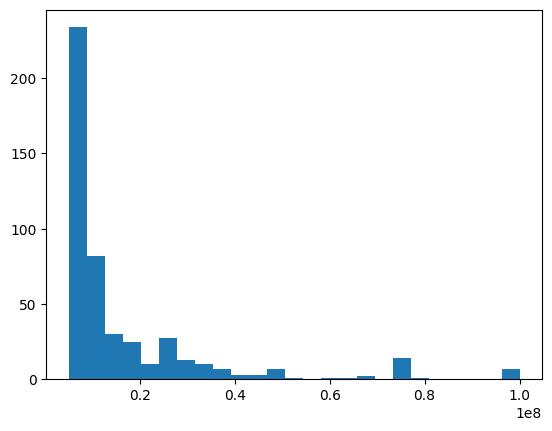

In [24]:
# gifts greater than or equal to fifty million dollars
foreigngiftsbig = foreigngifts["Foreign Gift Amount"].where(foreigngifts["Foreign Gift Amount"] >= 5000000)
plt.hist(foreigngiftsbig, bins=25)

Text(0.5, 1.0, 'distribution of value of foreign gifts given to institutions')

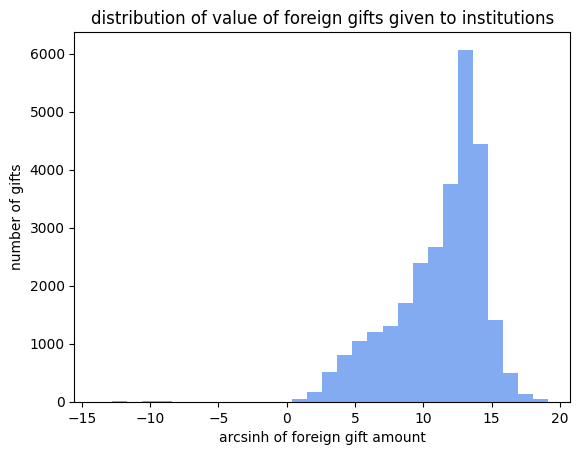

In [25]:
# histogram of inverse hyperbolic sine, so we can look at the distribution
# (there are apparently negative values? so we shouldn't use log) 
foreigngifts['Foreign Gift Amount arcsinh'] = np.arcsinh(foreigngifts['Foreign Gift Amount'])
fig, ax = plt.subplots()
ax.hist(foreigngifts['Foreign Gift Amount arcsinh'], bins=30,color="#82abf2")
ax.set_xlabel("arcsinh of foreign gift amount") 
ax.set_ylabel("number of gifts")
ax.set_title("distribution of value of foreign gifts given to institutions") 
# here we go. arcsinh. 

some notes/findings
- Our data is REALLY left skewed. That implies that the number of gifts with higher values are more concentrated in the dataset past the median.
- Gifts with negative inverse hyperbolic sines are represented by more than one bin. Foreign institutions thus took away people's money more than once...? (The Google AI search result thing told me that inverse hyperbolic sine of a negative number will always be negative when I looked it up to double check)
- A very visible tail peeks at right side of our histogram; the absurd gifts worth tens of millions of dollars are likely represented there. They may be outliers in our data, but there are enough of them that they're worth a second look if we want to properly assess our dataset. 

#### part three

<Axes: >

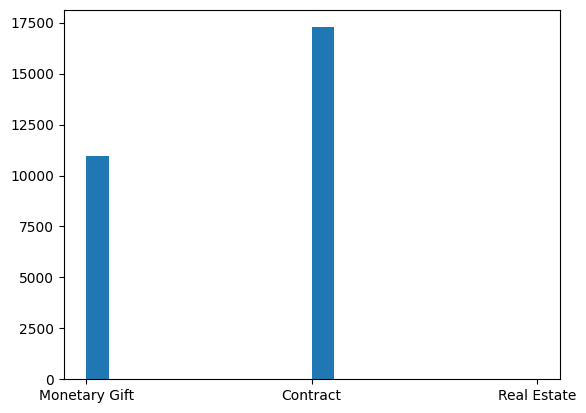

In [26]:
# here's a bar graph
foreigngifts['Gift Type'].hist(bins=20, grid=False)
# yeah that's not terribly useful

In [27]:
# a value-counts table will probably be more helpful.
foreigngifts['Gift Type'].value_counts()
# the proportion of gifts that are contract gifts is the largest. 
# the monetary gift category is about 2/3 the size of the contract...
# ...gift category. 
# but there are very few real estate gifts in comparison. 

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

In [28]:
# i could just divide by len(foreigngifts["Gift Type"]) to view proportions...
# ...they are seen below! 
foreigngifts['Gift Type'].value_counts()/len(foreigngifts['Gift Type'])

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64

#### part four

Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?

<Axes: ylabel='Density'>

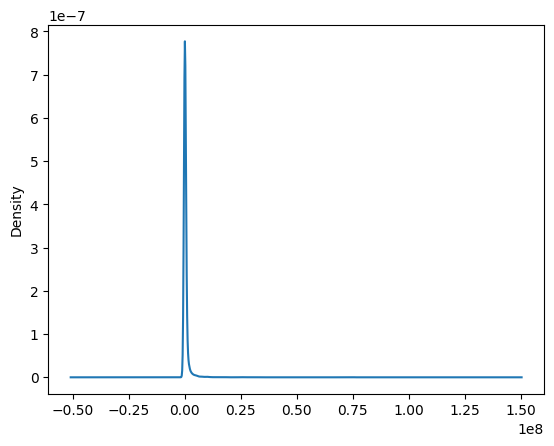

In [29]:
# foreign gift kernel density diagram
# normal version
foreigngifts["Foreign Gift Amount"].plot.density()
# ew 

/home/phisherman7/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Density'>

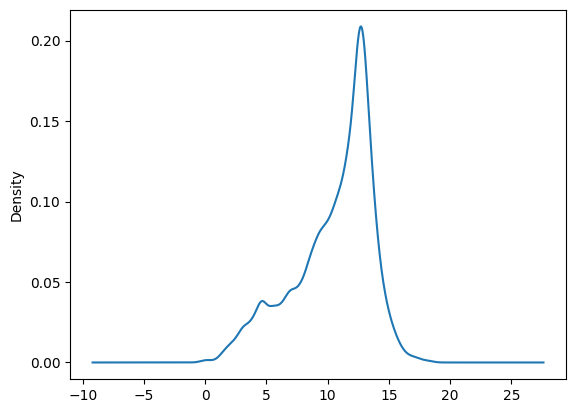

In [30]:
# foreign gift kernel density of the LOG!!!
foreigngifts['Foreign Gift Amount log'] = np.log(foreigngifts['Foreign Gift Amount'])
foreigngifts['Foreign Gift Amount log'].plot.density()
# we can see patterns much more clearly here. 

[Text(0.5, 1.0, 'Grouped KDE Plot')]

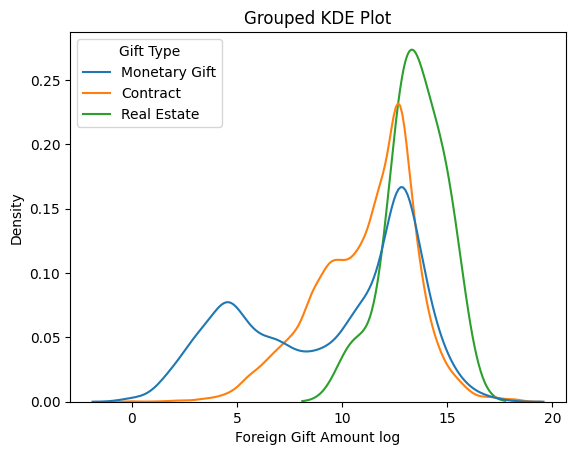

In [31]:
# foreign gift kernel density of the log, stratified by gift type. 
conditioning = 'Gift Type'
var = 'Foreign Gift Amount log'
sns.kdeplot(data=foreigngifts, x=var, hue=conditioning, common_norm=False).set(title='Grouped KDE Plot')

some insights: 
- There is a high concentration of "monetary gifts" at relatively lower gift values. You see a little peak around a log of 5. "Monetary gifts" are also fairly highly concentrated at medium-high values as well, though (between log of 10 and log of 15). They probably represent money sent to institutions to fund research or something. 
- On the other hand, "Real Estate" gift types are concentrated at higher prices. I assume that they're given to help institutions to (physically/geographically) expand. They also probably represent the massive outliers we see in our data - you know, those gifts worth millions of dollars. (I suppose this is an instance where we do not wish to exclude our outliers, and should pay close attention to them instead, because they say something significant about our data.)
- "Contract gifts" (which I'm assuming represent gifts made in a contract between two institutions) are concentrated right between logs 10 and 15, but there is a small bump at log 10. 

#### part five

5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

In [32]:
# top fifteen countries in terms of number of gifts 
foreigngifts["Country of Giftor"] = foreigngifts["Country of Giftor"].str.lower()
country_giftors_quant = pd.DataFrame(foreigngifts["Country of Giftor"].value_counts())
country_giftors_quant.head(15)

,count
Country of Giftor,
england,3655
china,2461
canada,2344
japan,1896
switzerland,1676
saudi arabia,1610
france,1437
germany,1394
hong kong,1080


In [33]:
# top fifteen countries ranked by amount given 
amount_gift_quants = pd.DataFrame(foreigngifts.groupby(foreigngifts['Country of Giftor'])["Foreign Gift Amount"].sum())
# then we sort these by amount
amount_gift_quants = amount_gift_quants.sort_values(by="Foreign Gift Amount",ascending=False) 
amount_gift_quants.head(15)

,Foreign Gift Amount
Country of Giftor,
qatar,2706240869
england,1464906771
china,1237952112
saudi arabia,1065205930
bermuda,899593972
canada,898160656
hong kong,887402529
japan,655954776
switzerland,619899445


#### part six 

6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 

In [34]:
# top fifteen institutions in terms of money received
amount_gift_inst = pd.DataFrame(foreigngifts.groupby(foreigngifts['Institution Name'])["Foreign Gift Amount"].sum())
amount_gift_inst = amount_gift_inst.sort_values(by="Foreign Gift Amount", ascending=False)
amount_gift_inst.head(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


In [35]:
# are our columns are indices now? 
amount_gift_inst.columns

Index(['Foreign Gift Amount'], dtype='object')

In [36]:
# i guess so. let's take a look. i think it's a side effect of groupby(). 
amount_gift_inst.index

Index(['Carnegie Mellon University', 'Cornell University',
       'Harvard University', 'Massachusetts Institute of Technology',
       'Yale University', 'Texas A&M University', 'Johns Hopkins University',
       'Northwestern University', 'Georgetown University',
       'University of Chicago (The)',
       ...
       'California State University, Dominguez Hills', 'Yeshiva University',
       'Marquette University', 'Bates College',
       'Beth Medrash Govoha of America', 'Jacksonville State University',
       'Metropolitan State University', 'University of California, Merced',
       'University of Central Oklahoma', 'University of Jamestown'],
      dtype='object', name='Institution Name', length=318)

<BarContainer object of 318 artists>

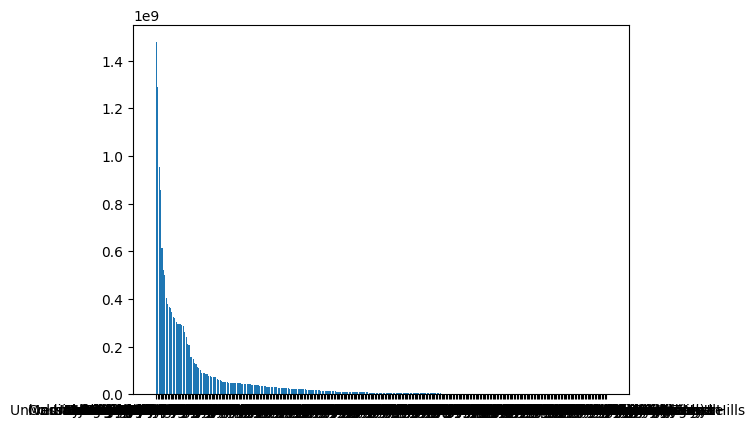

In [37]:
# histogram (erm akshually it's a bar chart...histograms have...
# ...quantitative values on the x-axis.) 
x=amount_gift_inst.index
y=amount_gift_inst["Foreign Gift Amount"]
plt.bar(x, y) 
# it's like the lobotomy graph in class. 

(array([291.,  11.,   9.,   2.,   1.,   1.,   1.,   0.,   1.,   1.]),
 array([5.00000000e+02, 1.47792700e+08, 2.95584901e+08, 4.43377101e+08,
        5.91169302e+08, 7.38961502e+08, 8.86753702e+08, 1.03454590e+09,
        1.18233810e+09, 1.33013030e+09, 1.47792250e+09]),
 <BarContainer object of 10 artists>)

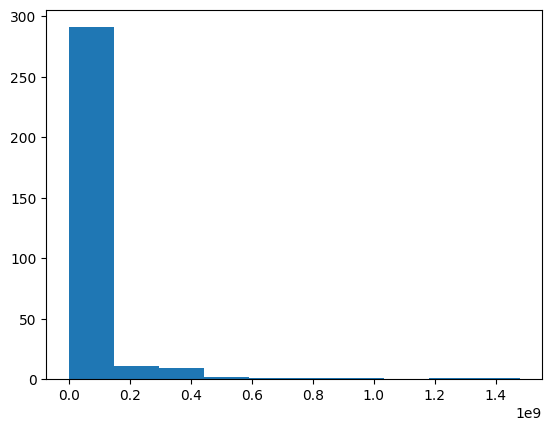

In [38]:
# it will be more useful, for our purposes, to make a histogram of...
# ...frequency at which institutions tend to receive gifts within certain...
# ...ranges
plt.hist(amount_gift_inst)
# absurdly unhelpful graph considering certain institutions receive gifts...
# ...that are FAR greater than others'. 

In [39]:
# wanna see what summary statistics we have so we know what transformation...
# ...to use 
amount_gift_inst.describe()
# YEAH WE CAN USE LOG. NO NEGATIVE NUMBERS

,Foreign Gift Amount
count,3.180000e+02
mean,5.220288e+07
std,1.535716e+08
min,5.000000e+02
25%,1.588842e+06
50%,6.486792e+06
75%,3.177063e+07
max,1.477923e+09


Text(0.5, 1.0, 'distribution of total amount of gift money received by institutions')

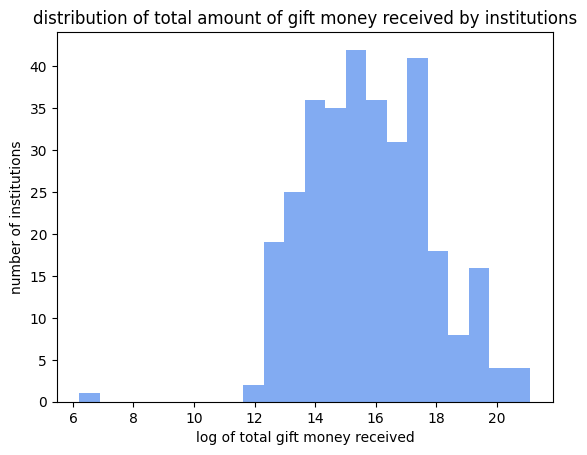

In [40]:
# we can transform the data we have. 
amt_gift_inst_log = np.log(amount_gift_inst)
fig, ax = plt.subplots()
# and make the histogram. 
ax.hist(amt_gift_inst_log, bins=22, color="#82abf2")
ax.set_ylabel("number of institutions") 
ax.set_xlabel("log of total gift money received")
ax.set_title("distribution of total amount of gift money received by institutions") 

#### part seven

In [41]:
# can we make a table of giftors? 
foreigngifts["Giftor Name"] = foreigngifts["Giftor Name"].str.lower()
giftor_totals = pd.DataFrame(foreigngifts.groupby(foreigngifts["Giftor Name"])["Foreign Gift Amount"].sum())
giftor_totals.sort_values(["Foreign Gift Amount"], ascending=False).head(15)
# the DATA IS SO UNCLEAN WOW 

,Foreign Gift Amount
Giftor Name,
qatar foundation,1166503744
qatar foundation/qatar national res,796197000
qatar foundation for education,373945215
anonymous,340875204
saudi arabian cultural mission,277598687
hcl,190000000
church of jesus christ of lds,185203715
emirates institute for advanced sc,170641244
qic,148355497


In [42]:
# surveying what we have to begin the cleaning process
all_giftors = giftor_totals.index
# count all elements in the list 
pd.DataFrame(all_giftors.value_counts()).sort_values(["count"], ascending=False)
# IS THERE SERIOUSLY ONE OF EACH ELEMENT 

,count
Giftor Name,
"""spenninger, claus""",1
école polytechnique fédérale,1
"""bremer, patrick""",1
"""buzzi, stephane""",1
"""imachi, hiroyuki""",1
...,...
"zhu, jun",1
"zhu, kejun",1
"zhu, steven",1


In [43]:
# because i only have so much time, i'd like to refer back to the table...
# ...where the values are sorted by the quantity each donor donated. 

# the most money seems to come from: 
    # the qatar foundation 
    # the saudi government (through the saudi cultural mission or elsewhere),
    # and HCL (which is an IT company based in noida, india). 

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.